In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris-flower-dataset/IRIS.csv


 The Iris flower dataset consists of three species: setosa, versicolor,
 and virginica. These species can be distinguished based on their
 measurements. Now, imagine that you have the measurements
 of Iris flowers categorized by their respective species. Your
 objective is to train a machine learning model that can learn from
 these measurements and accurately classify the Iris flowers into
 their respective species.
 
 Use the Iris dataset to develop a model that can classify iris
 flowers into different species based on their sepal and petal
 measurements. This dataset is widely used for introductory
 classification tasks.

In [2]:
import pandas as pd
df=pd.read_csv("/kaggle/input/iris-flower-dataset/IRIS.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
# Check for unique values in the species column
df['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [7]:
# Label encoding for species column
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])  # Encode labels (setosa=0, versicolor=1, virginica=2)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

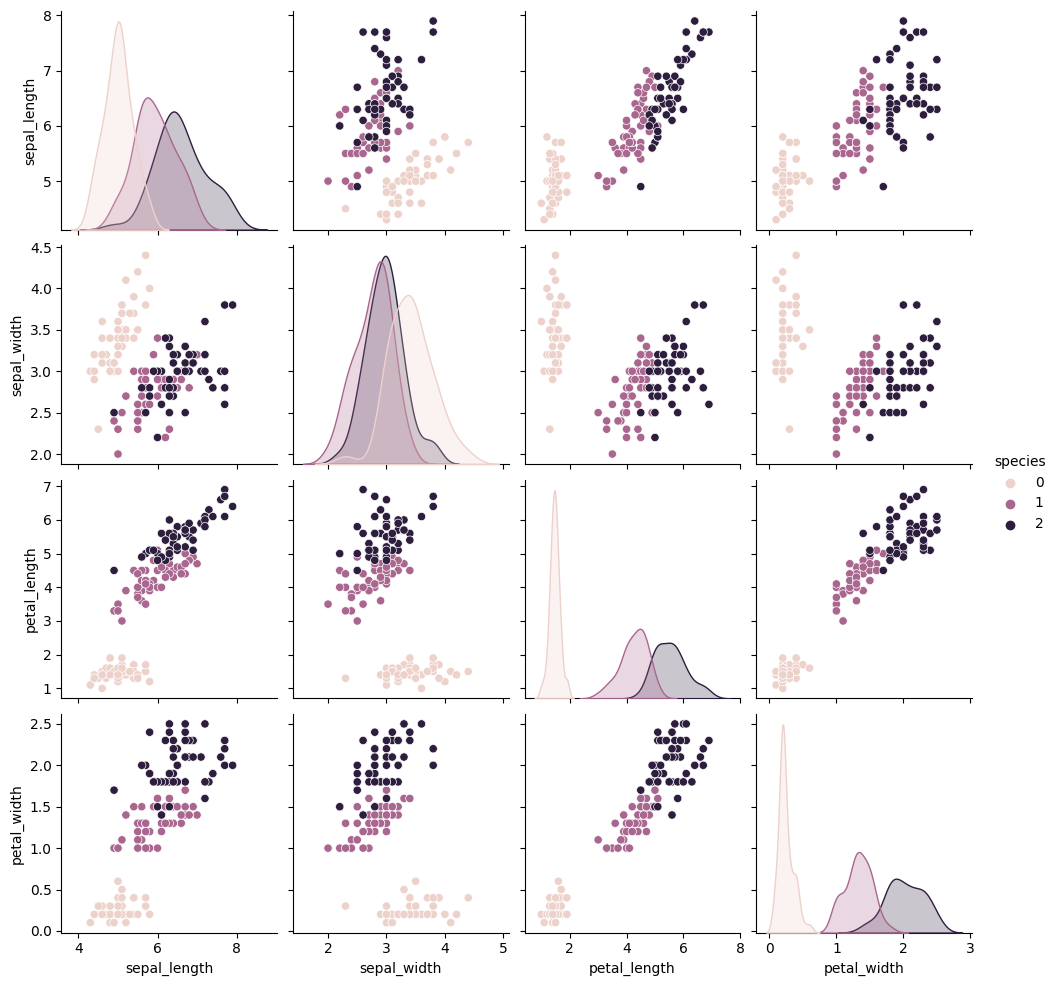

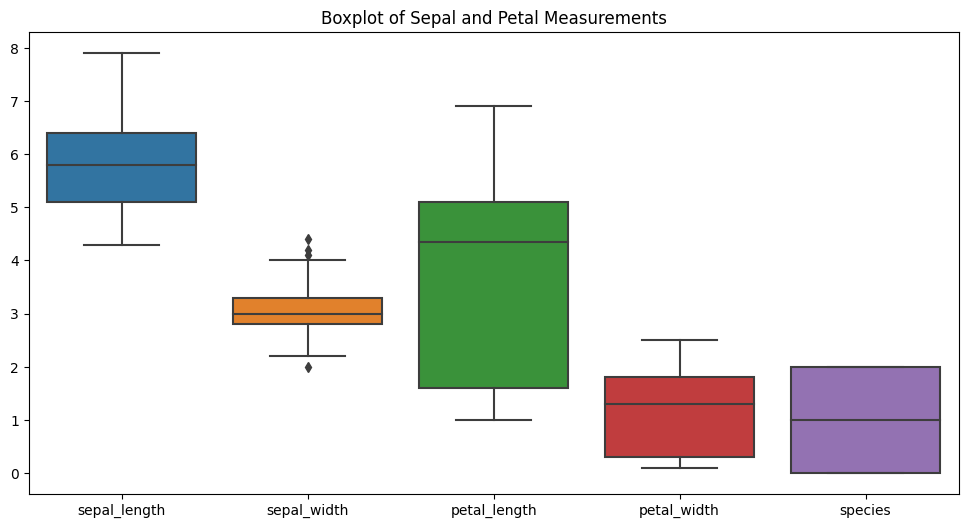

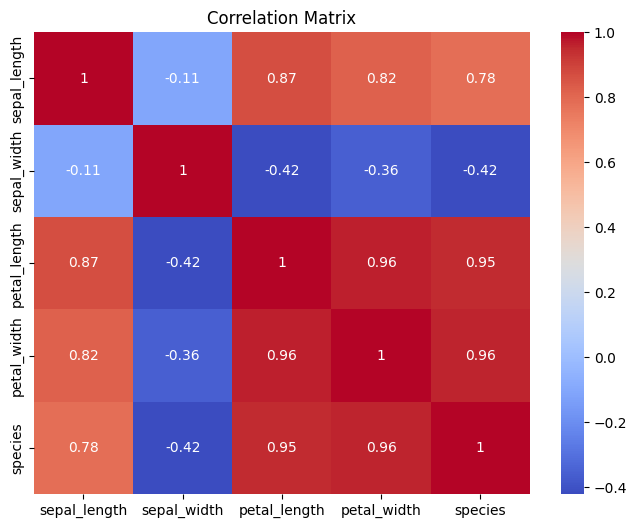

In [8]:
# Pairplot to see relationships between different features
sns.pairplot(df, hue="species")
plt.show()

# Boxplot for feature distribution
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title("Boxplot of Sepal and Petal Measurements")
plt.show()

# Heatmap for correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [9]:
# Splitting features (X) and target (y)
X = df.drop('species', axis=1)
y = df['species']

In [10]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [11]:
# Train a Logistic Regression model
lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)

# Predictions and evaluation
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [12]:
# Train a Decision Tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Predictions and evaluation
y_pred_dt = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [13]:
# Train a Random Forest model
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

# Predictions and evaluation
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [14]:
# Train a Support Vector Classifier
svc = SVC()
svc.fit(X_train, y_train)

# Predictions and evaluation
y_pred_svc = svc.predict(X_test)
print("SVC Accuracy:", accuracy_score(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc))


SVC Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [15]:
# Train a KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predictions and evaluation
y_pred_knn = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


KNN Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [16]:
# Compare accuracy of different models
models = {
    'Logistic Regression': accuracy_score(y_test, y_pred_lr),
    'Decision Tree': accuracy_score(y_test, y_pred_dt),
    'Random Forest': accuracy_score(y_test, y_pred_rf),
    'SVC': accuracy_score(y_test, y_pred_svc),
    'KNN': accuracy_score(y_test, y_pred_knn)
}

# Print model accuracy
for model, accuracy in models.items():
    print(f"{model}: {accuracy:.4f}")


Logistic Regression: 1.0000
Decision Tree: 1.0000
Random Forest: 1.0000
SVC: 1.0000
KNN: 1.0000


In [17]:
# New flower measurements
new_data = [[5.0, 3.4, 1.5, 0.2]]  # You can add more samples in this list if needed

# Predict the species for the new data using the trained KNN model
predicted_species = knn.predict(new_data)

# Convert the numerical prediction back to species name
predicted_species_label = le.inverse_transform(predicted_species)

# Output the predicted species
print(f"Predicted species for the given measurements: {predicted_species_label[0]}")


Predicted species for the given measurements: Iris-setosa


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [18]:
# Multiple new samples
new_data = [
    [5.0, 3.4, 1.5, 0.2],  # First sample
    [6.7, 3.0, 5.2, 2.3],  # Second sample
    [5.9, 3.2, 4.8, 1.8]   # Third sample
]

# Predict the species for multiple new samples
predicted_species = knn.predict(new_data)

# Convert numerical predictions back to species names
predicted_species_label = le.inverse_transform(predicted_species)

# Output the predicted species for each sample
for i, species in enumerate(predicted_species_label):
    print(f"Predicted species for sample {i + 1}: {species}")


Predicted species for sample 1: Iris-setosa
Predicted species for sample 2: Iris-virginica
Predicted species for sample 3: Iris-virginica


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns


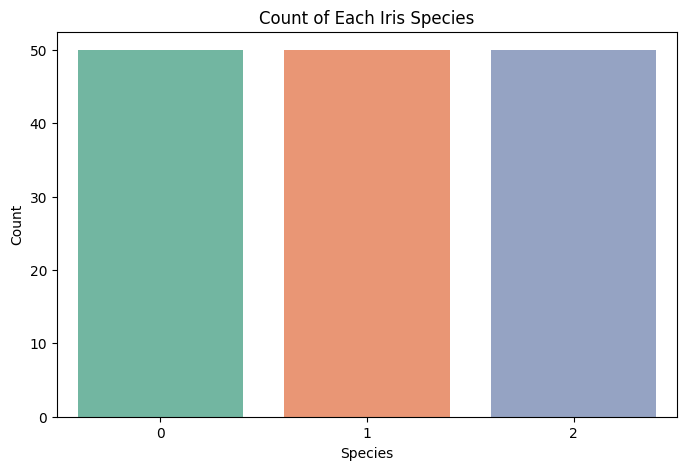

In [20]:
# Bar graph: Count of each species
plt.figure(figsize=(8, 5))
sns.countplot(x='species', data=df, palette='Set2')
plt.title("Count of Each Iris Species")
plt.xlabel("Species")
plt.ylabel("Count")
plt.show()


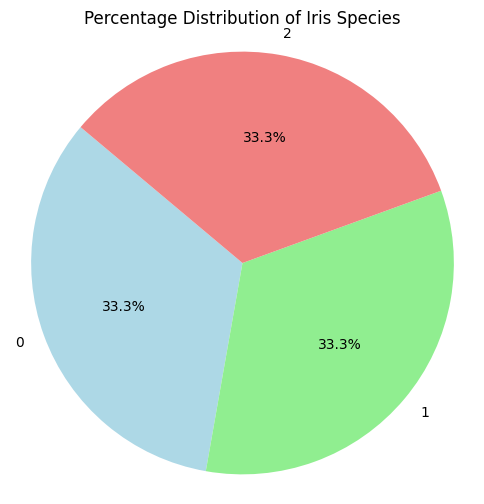

In [21]:
# Pie chart: Distribution of species
species_counts = df['species'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(species_counts, labels=species_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral'], startangle=140)
plt.title("Percentage Distribution of Iris Species")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


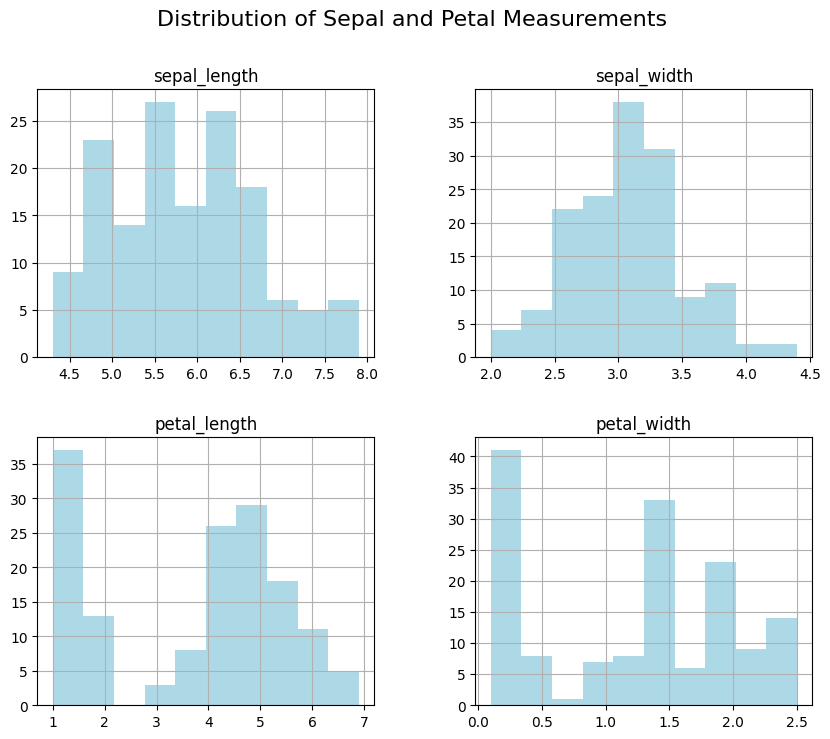

In [22]:
# Histograms: Distribution of sepal and petal measurements
df.hist(column=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], figsize=(10, 8), color='lightblue')
plt.suptitle("Distribution of Sepal and Petal Measurements", size=16)
plt.show()


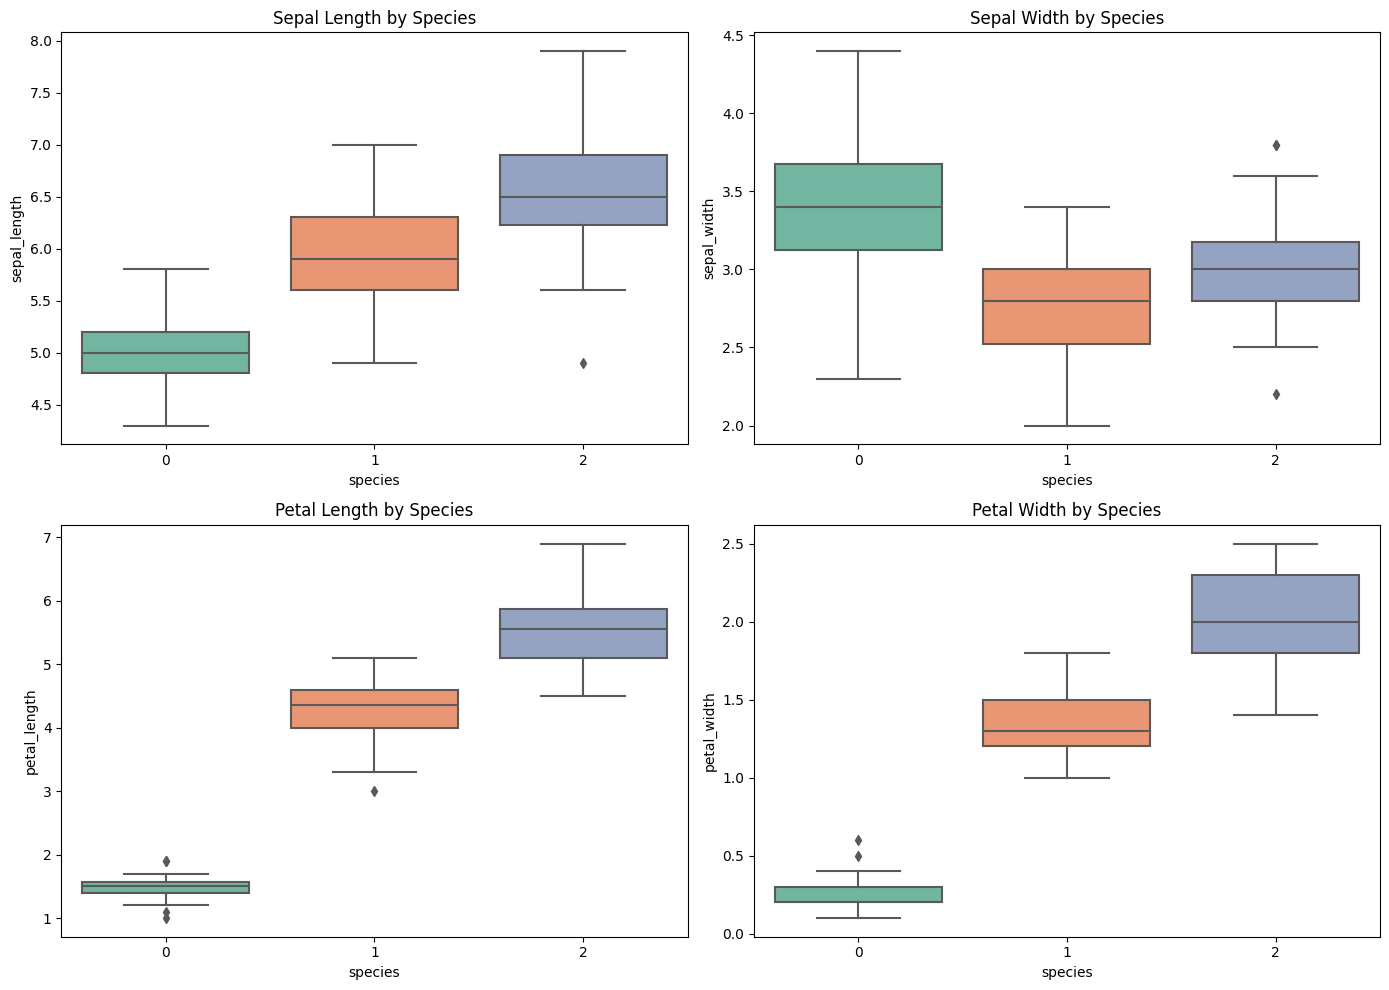

In [23]:
# Boxplots: Sepal length, Sepal width, Petal length, and Petal width by species
plt.figure(figsize=(14, 10))

# Sepal length
plt.subplot(2, 2, 1)
sns.boxplot(x='species', y='sepal_length', data=df, palette='Set2')
plt.title("Sepal Length by Species")

# Sepal width
plt.subplot(2, 2, 2)
sns.boxplot(x='species', y='sepal_width', data=df, palette='Set2')
plt.title("Sepal Width by Species")

# Petal length
plt.subplot(2, 2, 3)
sns.boxplot(x='species', y='petal_length', data=df, palette='Set2')
plt.title("Petal Length by Species")

# Petal width
plt.subplot(2, 2, 4)
sns.boxplot(x='species', y='petal_width', data=df, palette='Set2')
plt.title("Petal Width by Species")

plt.tight_layout()
plt.show()


**Summary of Visualizations:**
* Bar Graph: Visualizes the count of each Iris species.
* Pie Chart: Displays the percentage distribution of each species.
* Histograms: Show the distribution of each sepal and petal measurement.
* Boxplots: Display the spread of measurements across species.
* Pairplot: Visualizes relationships between different features, grouped by species.
* Heatmap: Shows the correlation between features.